In [1]:
# genomic traits analysis for the strains used in the experiment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')

In [3]:
import os
dpath = 'trait_gene_annotations'
os.listdir(dpath)

['42003_2022_3184_MOESM4_ESM_select_genomes.xlsx',
 'genetic_traits_table.tsv',
 'genetic_traits_table_filtered.tsv',
 'genomes_annotation_long_format.7z',
 'strain_list.csv']

In [4]:
strains = pd.read_csv(os.path.join(dpath, 'strain_list.csv'))

In [5]:
strains

,Species,GTDB taxonomy,NCBI taxonID,Accession number,Filename
0,Ruegeria pomeroyi DSS-3,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,246200,GCA_000011965.2,GCA_000011965
1,Pseudoalteromonas haloplanktis TAC125,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,326442,GCA_000026085.1,GCA_000026085
2,Alteromonas macleodii HOT1A3,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,529120,2687454166,2687453488
3,Marinobacter adhaerens HP15,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,225937,650377991,650377991
4,Phaeobacter gallaeciensis DSM 26640,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,1423144,GCA_000511385.1,GCA_000511385
5,Sulfitobacter pseudonitzschiae strain SMR1,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,1402135,CeMEB_private,Sulfitobacter_pseudonitzschiae_SMR1


In [6]:
vitamins_df = pd.read_excel(os.path.join(dpath, '42003_2022_3184_MOESM4_ESM_select_genomes.xlsx'), sheet_name='Supp_Data_4', skiprows=3)
vitamins_df.head()

,Unnamed: 0,GFC,Species,Taxon,Filename,B1-synt,B1-trans,B12-synt,B12-trans,B7-synt,B7-trans
0,NaN,1.0,gamma proteobacterium SCGC AAA076-D02,Gammaproteobacteria,2228664052,1,0,0,0,1,0
1,NaN,NaN,gamma proteobacterium SCGC AAA076-F14,Gammaproteobacteria,2236347022,1,0,0,0,1,0
2,NaN,NaN,SAR324 cluster deltaproteobacterium REDSEA-S10_B5,Others,2651870254,0,1,0,0,0,1
3,NaN,2.0,alpha proteobacterium sp. HIMB59,Alphaproteobacteria,2503982041,0,1,0,0,0,1
4,NaN,NaN,alpha proteobacterium SCGC AAA240-E13,Alphaproteobacteria,2236661011,1,0,0,0,0,1


In [40]:
excel_sheets_trait_names = ['Supp_Data_5', 'Supp_Data_6', 'Supp_Data_7', 'Supp_Data_9', 'Supp_Data_10']
fpath = os.path.join(dpath, '42003_2022_3184_MOESM4_ESM_select_genomes.xlsx')
names_of_traits = pd.concat([pd.read_excel(fpath, sheet_name=sheet, skiprows=3) for sheet in excel_sheets_trait_names], ignore_index=True)
names_of_traits.head()

,Unnamed: 0,ID,Description,Frequency,Interaction traits,co-occurrence with biosynthesis,Notes,KEGG hierarchy,...6,Reference,KEGG Orthology
0,NaN,4.B.1.1.4,"B1 (putative) transporter, 4.B.1.1.4",0.283,B1-trans,0.195,unknown,NaN,NaN,NaN,NaN
1,NaN,3.A.1.19.1,"B1 transporter, 3.A.1.19.1",0.203,B1-trans,0.091,importer,NaN,NaN,NaN,NaN
2,NaN,3.A.1.17.8,"B1 transporter, 3.A.1.17.8",0.104,B1-trans,0.04,importer,NaN,NaN,NaN,NaN
3,NaN,2.A.7.3.40,"B1 transporter, 2.A.7.3.40",0.044,B1-trans,0.011,exporter,NaN,NaN,NaN,NaN
4,NaN,2.A.7.3.39,"B1 transporter, 2.A.7.3.39",0.025,B1-trans,0.017,exporter,NaN,NaN,NaN,NaN


In [32]:
traits_df = pd.read_csv(os.path.join(dpath, 'genetic_traits_table.tsv'), sep='\t')
traits_df.head()

,filename,M00001,M00002,M00003,M00004,M00005,M00006,M00007,M00008,M00009,...,pvuABCDE,pvsABCDE,Auxin.TAM,Auxin.Ipyr,Auxin.IAN,Auxin.IAM,DMSP_demethylation,DMSP_cleavage,DHPS_catabolism,Taurine_in_TCA
0,2228664052.fna,0,1,1,0,1,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,2236347022.fna,0,1,1,0,1,1,1,0,0,...,0,0,0,1,0,0,1,0,1,1
2,2236661011.fna,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
3,2501651206.fna,1,1,1,0,1,0,1,0,0,...,1,0,1,1,0,0,0,0,0,0
4,2501651207.fna,0,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [33]:
traits_df['filename'] = traits_df.filename.str.replace('.fna', '', regex=False)

In [34]:
strain_files = strains.Filename

In [35]:
traits_df.loc[traits_df.filename.isin(strain_files)]

,filename,M00001,M00002,M00003,M00004,M00005,M00006,M00007,M00008,M00009,...,pvuABCDE,pvsABCDE,Auxin.TAM,Auxin.Ipyr,Auxin.IAN,Auxin.IAM,DMSP_demethylation,DMSP_cleavage,DHPS_catabolism,Taurine_in_TCA
254,2687453488,0,1,1,1,1,1,1,1,1,...,0,0,1,1,0,0,0,0,0,0
367,650377991,0,1,1,1,1,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
377,GCA_000011965,0,1,1,1,1,0,1,1,1,...,0,0,1,1,1,0,1,0,1,1
411,GCA_000026085,0,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,0,0,0,0
445,GCA_000511385,0,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,1,0,1,1
472,Sulfitobacter_pseudonitzschiae_SMR1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1


In [36]:
strains

,Species,GTDB taxonomy,NCBI taxonID,Accession number,Filename
0,Ruegeria pomeroyi DSS-3,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,246200,GCA_000011965.2,GCA_000011965
1,Pseudoalteromonas haloplanktis TAC125,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,326442,GCA_000026085.1,GCA_000026085
2,Alteromonas macleodii HOT1A3,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,529120,2687454166,2687453488
3,Marinobacter adhaerens HP15,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,225937,650377991,650377991
4,Phaeobacter gallaeciensis DSM 26640,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,1423144,GCA_000511385.1,GCA_000511385
5,Sulfitobacter pseudonitzschiae strain SMR1,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,1402135,CeMEB_private,Sulfitobacter_pseudonitzschiae_SMR1


In [41]:
mtdf = pd.merge(
    strains[['Species', 'Filename']], traits_df, left_on='Filename', right_on='filename', how='left',  
).melt(
    id_vars=['Species', 'filename', 'Filename'],var_name='ID', value_name='Has_Trait'
)

In [59]:
names_of_traits['ID'] = names_of_traits.ID.str.replace(
    'Auxin-', 'Auxin.', regex=False
).str.replace(
    'TfuA-', 'TfuA.', regex=False
).str.replace(
    'NRPS-', 'NRPS.', regex=False
).str.replace(
    r'^(\d\.)', r'X\1', regex=True
)

In [60]:
mtdf1 = pd.merge(mtdf, names_of_traits, on='ID', how='left')

In [61]:
mtdf1.loc[mtdf1.Description.isna()]['ID'].unique()

array([], dtype=object)

In [64]:
mtdf1.columns

Index(['Species', 'filename', 'Filename', 'ID', 'Has_Trait', 'Unnamed: 0',
       'Description', 'Frequency', 'Interaction traits',
       'co-occurrence with biosynthesis', 'Notes', 'KEGG hierarchy', '...6',
       'Reference', 'KEGG Orthology'],
      dtype='object')

In [67]:
pmtdf1 = mtdf1.pivot(
    index=['ID', 
       'Description', 'Frequency', 'Interaction traits',
       'co-occurrence with biosynthesis', 'Notes', 'KEGG hierarchy', '...6',
       'Reference', 'KEGG Orthology'],
    columns=['Species'],
    values='Has_Trait',
    
).reset_index()

In [68]:
pmtdf1

Species,ID,Description,Frequency,Interaction traits,co-occurrence with biosynthesis,Notes,KEGG hierarchy,...6,Reference,KEGG Orthology,Alteromonas macleodii HOT1A3,Marinobacter adhaerens HP15,Phaeobacter gallaeciensis DSM 26640,Pseudoalteromonas haloplanktis TAC125,Ruegeria pomeroyi DSS-3,Sulfitobacter pseudonitzschiae strain SMR1
0,Auxin.IAM,IAA from indole-3-acetamide (IAM),0.029598,Auxin-IAM,NaN,2 reactions to go from tryptophan to IAA. 1st ...,NaN,NaN,"Hutcheson and Kosuge. J Biol Chem. 1985, 260(1...","K00466,K01426| K00466,K21801",0,0,0,0,0,1
1,Auxin.IAN,IAA from indole-3-acetonitrile (IAN),0.078224,Auxin-IAN,NaN,4-8 reactions to go from tryptophan to IAA,NaN,NaN,NaN,"K11812,K11868,K01501| K11812,K11868,K01721,K01...",0,0,1,0,1,1
2,Auxin.Ipyr,IAA from indole-3-pyruvate (Pyr),0.704017,Auxin-Ipyr,NaN,2-3 reactions to go from tryptophan to IAA; 1s...,NaN,NaN,"Koga et al. Biochim Biophys Acta. 1994, 1209, ...","K03334,K04103,K00128| K03334,K04103,K14085| K0...",1,1,1,1,1,1
3,Auxin.TAM,IAA from tryptamine (TAM),0.807611,Auxin-TAM,NaN,3 reactions to go from tryptophan to IAA,NaN,NaN,NaN,"K01593,K11182,K00128| K01593,K11182,K14085| K0...",1,1,1,1,1,1
4,CDPS,tRNA-dependent cyclodipeptide synthases,0.002114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,pvsABCDE,Operon for Vibrioferrin biosynthesis,0.128964,Siderophore-synt,NaN,NaN,NaN,NaN,10.1128/JB.185.23.6938-6949.2003,NaN,0,0,1,0,0,0
574,pvuABCDE,Operon for Vibrioferrin utilization,0.403805,Siderophore-trans,NaN,NaN,NaN,NaN,10.1128/JB.185.23.6938-6949.2003,NaN,0,1,1,1,0,1
575,siderophore,Siderophore cluster,0.065539,Siderophore-synt,NaN,Photolysis of iron–siderophore chelates promot...,NaN,NaN,"Amin et al., 2009, PNAS, 10.1073兾pnas.0905512106",NaN,0,0,0,0,0,0
576,terpene,Terpene,0.270613,NaN,NaN,Important role in intra- and inter-kingdom int...,NaN,NaN,"Schulz-Bohm et al., 2017, Front Microbiol, 10....",NaN,0,0,0,0,0,0


In [69]:
pmtdf1.to_excel('10cc_experimental_traits.xlsx')

In [72]:
pdf = mtdf1.pivot(
    index=['ID', 
       #'Description', 'Frequency', 'Interaction traits',
       #'co-occurrence with biosynthesis', 'Notes', 'KEGG hierarchy', '...6',
       #'Reference', 'KEGG Orthology'
          ],
    columns=['Species'],
    values='Has_Trait',
    )

In [76]:
pdf_small = pdf.loc[(pdf.sum(axis=1) >0) & (pdf.sum(axis=1) < 6)]

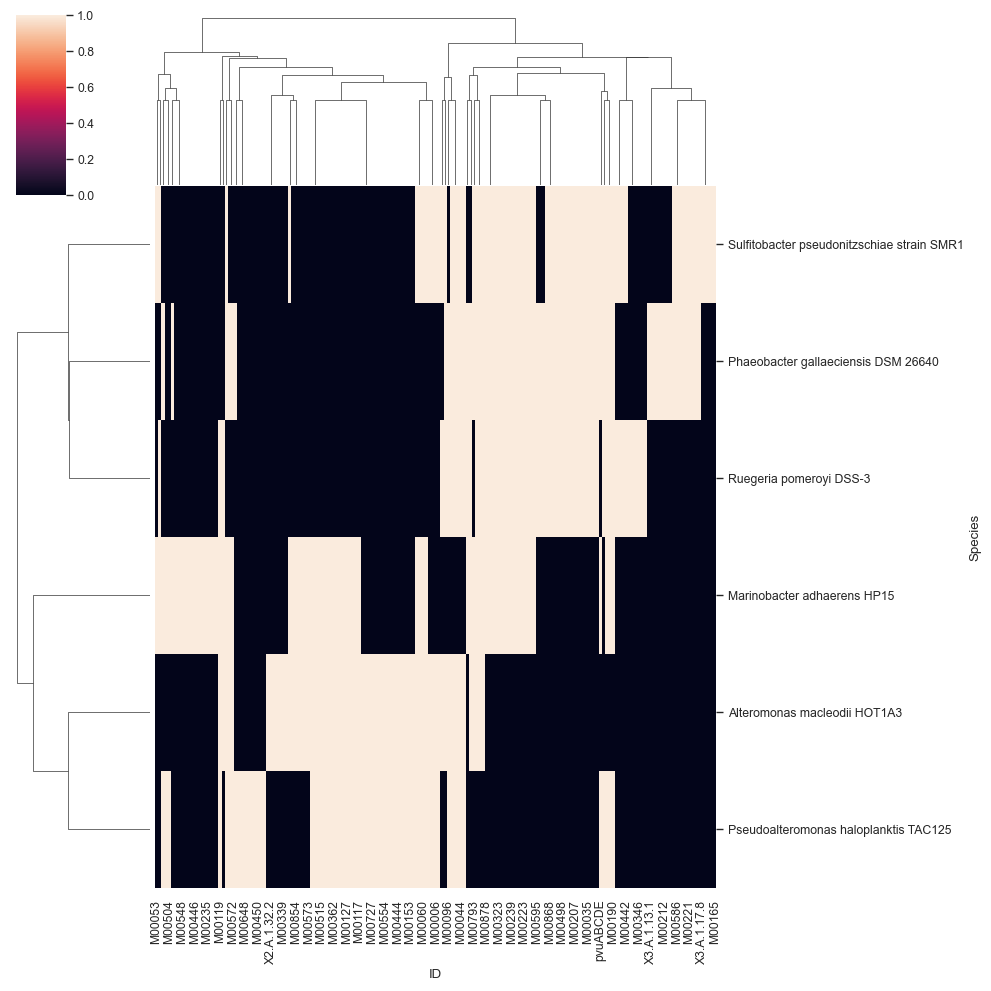

In [78]:
sns.set_context('paper')
sns.clustermap(data=pdf_small.T,
              )